# Notebook 1: Basics of mpl
Nov 27th 2021 <br>
Author: Alejandro Granados, PhD (following the book from Nicolas Rougier) 

## Stacked density plot 

Overview <br>
* Using axis in a smart way to create a seemingly complex figure 
* Using data and figure coordinates to place text robustly 
* Using camp as a gradual quantitative palette in a ver easy way 

In [2]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
# Come up with a random distribution-like curve with sums of gaussians with random parameters (but same scale) 
def curve():
    n = np.random.randint(1,5)
    centers = np.random.normal(0.0, 1.0, n) 
    widths = np.random.uniform(5.0, 50.0, n) 
    widths = 10 * widths / widths.sum() 
    scales = np.random.uniform(0.1,1.0, n) 
    scales = scales/scales.sum() 
    X = np.zeros(500) 
    x = np.linspace(-3,3, len(X)) 
    for center, width, scale in zip(centers,widths, scales): 
        X = X + scale * np.exp(-(x-center) * (x-center)  * width  ) 
    return X

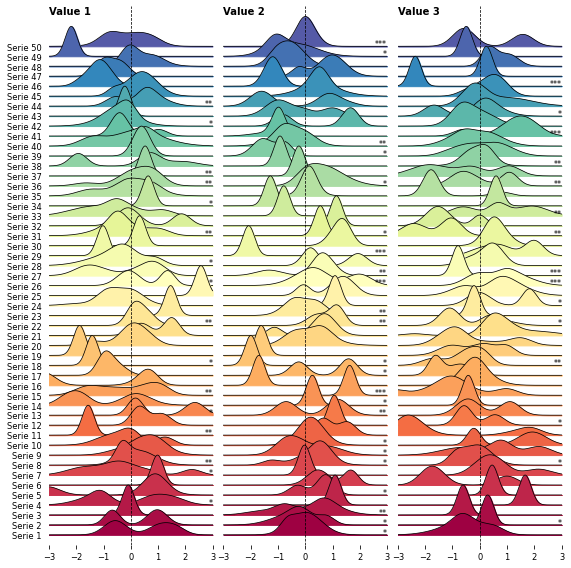

In [138]:

np.random.seed(123) 
# basic plotting parameters 
cmap = mpl.cm.get_cmap('Spectral') 
fig  = plt.figure(figsize = (8,8) ) 



ax = None 

for n in range(3): 
    ax = plt.subplot(1,3, n+1 , frameon = False, sharex = ax) 
    for i in range(50): 
        Y = curve() 
        # Select the range for X 
        X = np.linspace(-3,3,len(Y)) 
        # Plot the curve adding an offset for each "row", in this case i 
        # zorder 100 - i makes sure that the last plot with be on top and first at the very bottom 
        ax.plot(X, 3*Y + i, color = "k", linewidth = 0.75, zorder = 100 -i ) 
        # choose a color (make it a continuos gradient using the row index) 
        color = cmap(i/50)
        # color the area within X, from Y =[i, i + 3Y] 
        ax.fill_between(X, 3*Y + i, i, color = color , zorder = 100-i ) 
        
        # Extra 
        v = np.random.uniform(0,1) # generate random data 
        if v < 0.4: 
            text = "*"
            if v < 0.05: 
                text = "***"
            elif v < 0.2: 
                text = "**"
                
            ax.text( 
                3.0, i, text, # in this ax: x =3 (max val), y pos = i, text = string
                ha = "right", 
                va = "baseline",
                size = 8, 
                transform = ax.transData, # use actual data coordinates 
                zorder = 300, 
            )
    
    # For each column (subplot/ax) 
    ax.yaxis.set_tick_params(tick1On = False) 
    ax.set_xlim(-3,3) 
    ax.set_ylim(-1,53) 
    # Add dashed line at 0: within this ax (subplot) object) 
    ax.axvline(0.0, ls = "--", lw = 0.75, color = "black", zorder= 250) 
    
    ax.text(
        0.0, 
        1.0, 
        "Value %d" % (n+1), 
        ha = "left", 
        va = "top", 
        weight = "bold", 
        transform = ax.transAxes, # use normalized data coordinates (0,1) 
    )
    
    if n ==0: 
        ax.yaxis.set_tick_params(labelleft = True) 
        ax.set_yticks(np.arange(50) ) 
        ax.set_yticklabels(["Serie %d" % i for i in range(1, 51) ]) 
    else: 
        ax.yaxis.set_tick_params(labelleft = False) 
plt.tight_layout() 

plt.savefig('figures/introduction_stacked_densities.pdf') 

plt.show() 

## Multi-panel figure: combining Log and linear scales 

In [132]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, MultipleLocator

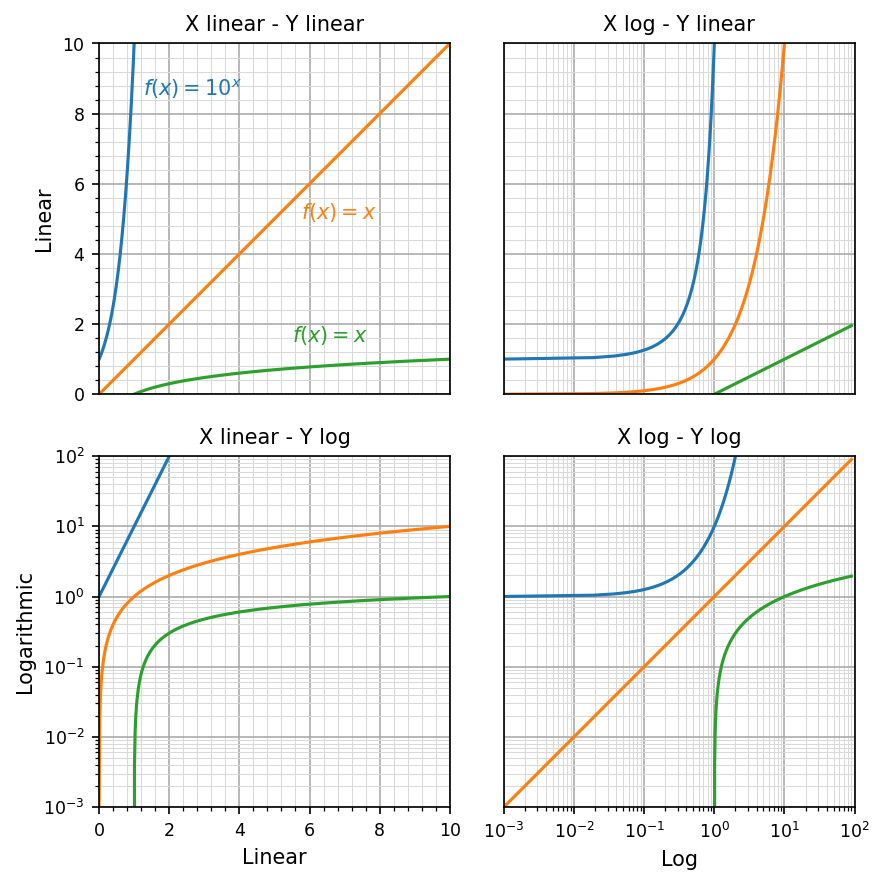

In [140]:

# generate some data 
X = np.linspace(0.001, 90, 5000) 
# Start the new figure every time! 
figure = plt.figure(figsize = (6,6), dpi = 150)

# Style parameters 
plt.rc("font", family = "Roboto" ) 
plt.rc("xtick", labelsize = "small") 
plt.rc("ytick", labelsize = "small")
plt.rc("axes", labelsize ="medium", titlesize ="medium") 




# Panel 1 
# X-linear Y-linear 
ax1 = plt.subplot(2,2,1, xlim = (0.0, 10) , ylim = (0.0, 10)) 
ax1.plot(X, 10** X, color = "C0") # C0, C1, match the default palette 
ax1.plot(X, X, color = "C1") 
ax1.plot(X, np.log10(X) , color = "C2") 
ax1.set_ylabel("Linear") 
# OPTIONAL :parameters for drawing grid lines 
# Most of the times the grid line is not necessary 
# Here it might be so the reader can follow the log scales 
ax1.xaxis.set_major_locator(MultipleLocator(2.0) )  # interval for major grid lines (usually thicker) 
ax1.xaxis.set_minor_locator(MultipleLocator(0.4) )  # interval for minor grid lines (0.4  = 5 segments within 2 data units) 
ax1.yaxis.set_major_locator(MultipleLocator(2.0) ) 
ax1.yaxis.set_minor_locator(MultipleLocator(0.4) ) 
# color: (0,1) higher -> dimmer color 
# draw minor and major lines 
ax1.grid(True, "minor", color = "0.85", linewidth = 0.5, zorder = -20)
ax1.grid(True, "major", color = "0.65", linewidth = 0.75, zorder = -10) 

# Since we are creating a multi-panel plot we don't need to draw the x
# axis -- NOTE: as long as it is shared with the subplot below 
ax1.tick_params(which = "both", labelbottom = False, bottom = False) 

ax1.text(1.25, 8.50, "$f(x) = 10^x$", color = "C0") 
ax1.text(5.75, 5.00, "$f(x) = x$", color = "C1") 
ax1.text(5.50, 1.50, "$f(x) = x$", color = "C2" ) # math latex format 
ax1.set_title("X linear - Y linear") 

###
# Panel 2
# X-log Y-linear 

ax2 = plt.subplot(2,2, 2, 
                  xlim = (0.001, 100),  
                  ylim = (0.0,10) , 
                  sharey = ax1) 
ax2.set_xscale("log") 
# We remove both the bottom and left ticks since those will be shared with the left
# and bottom plots 
ax2.tick_params(which = "both", labelbottom = False, bottom = False) 
ax2.tick_params(which = "both", labelleft = False, left = False) 
ax2.plot(X, 10 ** X, color = "C0") 
ax2.plot(X, X , color ="C1") # linear 
ax2.plot(X, np.log10(X) , color = "C2") 
# we don't change grid parameters here ...
ax2.grid(True, "minor", color = "0.85", linewidth = 0.50, zorder = -20 ) 
ax2.grid(True, "major", color = "0.65", linewidth = 0.75, zorder = -10 ) 
ax2.set_title("X log - Y linear")

### 
# Panel 3 
# X-linear Y-log 
ax3 = plt.subplot(2,2,3, 
                  xlim = (0.0,10), 
                  ylim =(0.001, 100), 
                  sharex = ax1) 
ax3.set_yscale('log') 
ax3.plot(X, 10 ** X , color = "C0") # exp fun
ax3.plot(X, X, color = "C1" ) # linear fun 
ax3.plot(X, np.log10(X) , color = "C2") # log function
ax3.set_ylabel("Logarithmic") 
ax3.set_xlabel("Linear") 

ax3.grid(True, "minor", color = "0.85", linewidth =0.50, zorder = -20) 
ax3.grid(True, "major", color = "0.65", linewidth =0.75, zorder = -10) 
ax3.set_title("X linear - Y log") 

# Panel 4 
# X -log Y- log 

ax4 = plt.subplot(2,2,4, xlim = (0.001, 100), 
                  ylim = (0.001,100), 
                  sharex = ax2,
                  sharey = ax3) 

ax4.set_xscale("log") 
ax4.set_yscale("log") 
# remove left axis (shared with left panel) 
ax4.tick_params(which = "both", labelleft = False, left = False) 
ax4.plot(X, 10**X, color = "C0") 
ax4.plot(X, X, color = "C1") 
ax4.plot(X, np.log10(X) , color = "C2") 
ax4.set_xlabel("Log") 
ax4.grid(True, "minor", color = "0.85", linewidth = 0.5, zorder = -20) 
ax4.grid(True, "major", color = "0.65", linewidth = 0.75, zorder = -10) 

ax4.set_title('X log - Y log') 

plt.tight_layout()
plt.show() 